In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.tokenize import RegexpTokenizer
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


In [2]:
app_description = pd.read_csv('appleStore_description.csv')
app_description.head()

,id,track_name,size_bytes,app_desc
0,281656475,PAC-MAN Premium,100788224,"SAVE 20%, now only $3.99 for a limited time!\n..."
1,281796108,Evernote - stay organized,158578688,Let Evernote change the way you organize your ...
2,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,Download the most popular free weather app pow...
3,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,The eBay app is the best way to find anything ...
4,282935706,Bible,92774400,On more than 250 million devices around the wo...


In [3]:
app_info = pd.read_csv('AppleStore.csv')
app_info = app_info.drop(columns = ['Unnamed: 0', 'id', 'vpp_lic', 'ver'], axis = 1)
app_info.rename(columns = {'rating_count_ver':'rating_count_cur','user_rating_ver':'user_rating_cur', 'sup_devices.num':'sup_devices_num','ipadSc_urls.num':'screenshot_num', 'lang.num':'lang_num'}, inplace = True)
app_info.head()

,track_name,size_bytes,currency,price,rating_count_tot,rating_count_cur,user_rating,user_rating_cur,cont_rating,prime_genre,sup_devices_num,screenshot_num,lang_num
0,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,4+,Games,38,5,10
1,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,4+,Productivity,37,5,23
2,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,4+,Weather,37,5,3
3,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.0,4.5,12+,Shopping,37,5,9
4,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,4+,Reference,37,5,45


In [4]:
app_description['rating_count_tot'] = app_info['rating_count_tot']
app_description.head()

,id,track_name,size_bytes,app_desc,rating_count_tot
0,281656475,PAC-MAN Premium,100788224,"SAVE 20%, now only $3.99 for a limited time!\n...",21292
1,281796108,Evernote - stay organized,158578688,Let Evernote change the way you organize your ...,161065
2,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,Download the most popular free weather app pow...,188583
3,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,The eBay app is the best way to find anything ...,262241
4,282935706,Bible,92774400,On more than 250 million devices around the wo...,985920


### All Descriptions

In [34]:
# Find the top three most frequent words
'''
for i in range(app_description.shape[0]):
    R_words = app_description['app_desc'][i]
    # remove punctuation
    tokenizer = RegexpTokenizer(r'\w+') 
    R_word_list = tokenizer.tokenize(R_words) 
    # lowercase and remove stopwords
    R_word_list = [word.lower() for word in R_word_list if word not in stopwords.words('english')] 
    # word frequence
    R_word_frequence = nltk.FreqDist(R_word_list)
    sort_freq = pd.Series(R_word_frequence).sort_values(ascending=False)
    if sort_freq.shape[0] >= 3:
        app_description.loc[i, 'most_freq_word_1st'] = sort_freq.index[0]
        app_description.loc[i, 'most_freq_word_2nd'] = sort_freq.index[1]
        app_description.loc[i, 'most_freq_word_3rd'] = sort_freq.index[2]
    elif sort_freq.shape[0] >= 2:
        app_description.loc[i, 'most_freq_word_1st'] = sort_freq.index[0]
        app_description.loc[i, 'most_freq_word_2nd'] = sort_freq.index[1]
    elif sort_freq.shape[0] >= 1:
        app_description.loc[i, 'most_freq_word_1st'] = sort_freq.index[0]
    else: 
        app_description.loc[i, 'most_freq_word_1st'] = 'NAN'
'''        

In [5]:
#app_description.to_csv('app_description_most_freq.csv')
app_description_most_freq = pd.read_csv('app_description_most_freq.csv')
app_description_most_freq.head()

,Unnamed: 0,id,track_name,size_bytes,app_desc,rating_count_tot,most_freq_word_1st,most_freq_word_2nd,most_freq_word_3rd
0,0,281656475,PAC-MAN Premium,100788224,"SAVE 20%, now only $3.99 for a limited time!\n...",21292,new,game,pac
1,1,281796108,Evernote - stay organized,158578688,Let Evernote change the way you organize your ...,161065,evernote,notes,work
2,2,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,Download the most popular free weather app pow...,188583,weather,alerts,forecasts
3,3,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,The eBay app is the best way to find anything ...,262241,items,ebay,find
4,4,282935706,Bible,92774400,On more than 250 million devices around the wo...,985920,bible,app,the


In [27]:
allapp_most_freq1 = app_description_most_freq.most_freq_word_1st.value_counts()
allapp_most_freq1 = allapp_most_freq1.drop('the')
allapp_most_freq1 = allapp_most_freq1.drop('5')
allapp_most_freq1 = allapp_most_freq1.drop('i')
allapp_most_freq1 = allapp_most_freq1.drop('de')
allapp_most_freq1 = allapp_most_freq1.drop('1')
allapp_most_freq1 = allapp_most_freq1.drop('com')
allapp_most_freq1 = allapp_most_freq1.drop('http')
allapp_most_freq1 = allapp_most_freq1.drop('us')

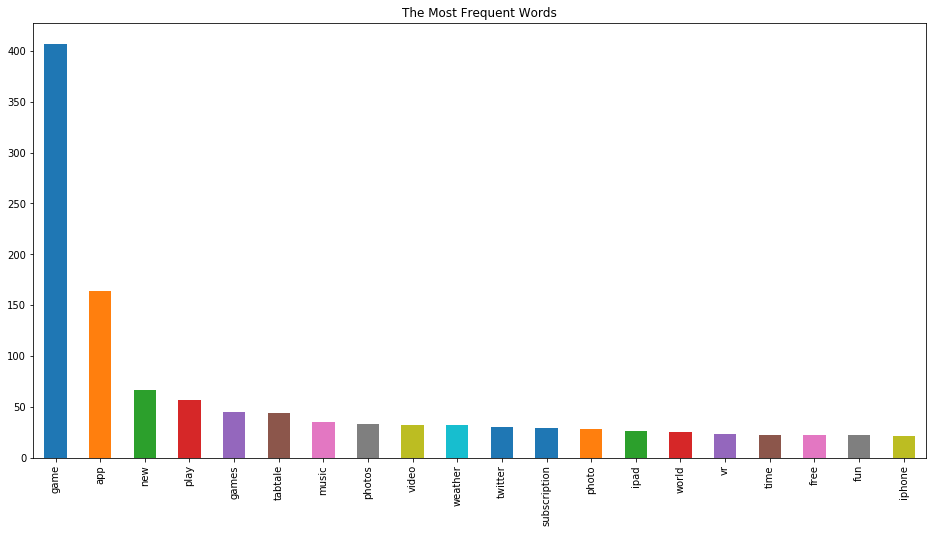

In [74]:
plt.figure(figsize=(16,8))
plt.title('The Most Frequent Words')
allapp_most_freq1.head(20).plot.bar()

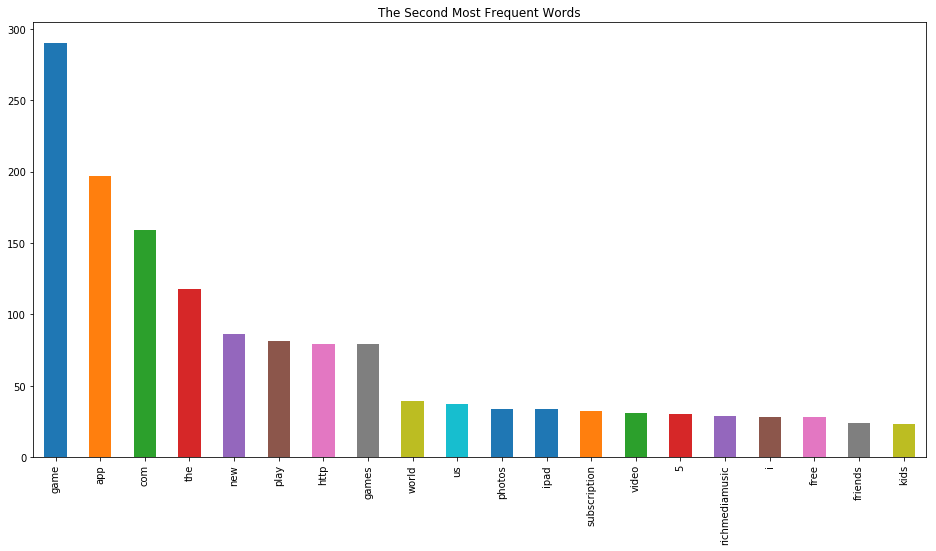

In [11]:
plt.figure(figsize=(16,8))
plt.title('The Second Most Frequent Words')
app_description_most_freq.most_freq_word_2nd.value_counts().head(20).plot.bar()

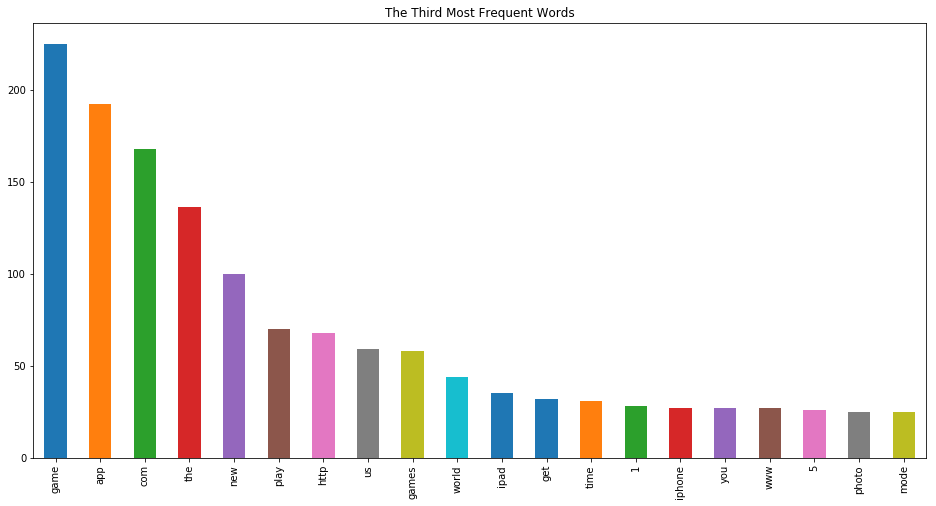

In [12]:
plt.figure(figsize=(16,8))
plt.title('The Third Most Frequent Words')
app_description_most_freq.most_freq_word_3rd.value_counts().head(20).plot.bar()

#### Word Cloud

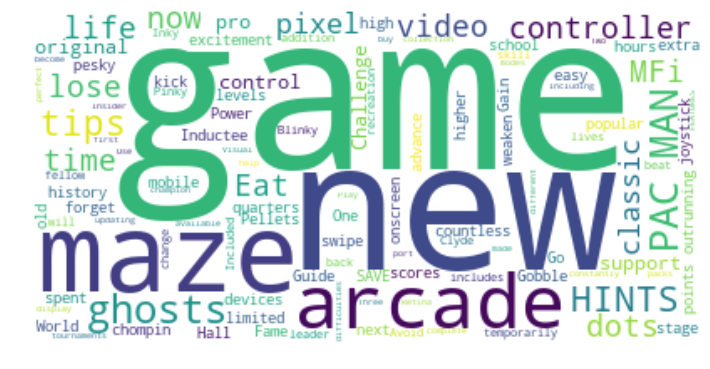

In [13]:
description = app_description_most_freq.app_desc[0]

# Create and generate a word cloud image:
wordcloud = WordCloud(background_color="white").generate(description)

# Display the generated image:
plt.figure(figsize=(12,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Top 500 Rating Count

In [6]:
Rating_count2 = app_description.sort_values('rating_count_tot',ascending = False).head(500)
Rating_count2.reset_index(inplace = True, drop = True)
Rating_count2.head()

,id,track_name,size_bytes,app_desc,rating_count_tot
0,284882215,Facebook,389879808,Keeping up with friends is faster than ever. \...,2974676
1,389801252,Instagram,113954816,Instagram is a simple way to capture and share...,2161558
2,529479190,Clash of Clans,116476928,Join millions of players worldwide as you buil...,2130805
3,420009108,Temple Run,65921024,"""In pretty much every treasure hunting adventu...",1724546
4,284035177,Pandora - Music & Radio,130242560,Find the music you love and let the music you ...,1126879


In [7]:
for i in range(Rating_count2.shape[0]):
    R_words = Rating_count2['app_desc'][i]
    # remove punctuation
    tokenizer = RegexpTokenizer(r'\w+') 
    R_word_list = tokenizer.tokenize(R_words) 
    # lowercase and remove stopwords
    R_word_list = [word.lower() for word in R_word_list if word not in stopwords.words('english')] 
    # word frequence
    R_word_frequence = nltk.FreqDist(R_word_list)
    sort_freq = pd.Series(R_word_frequence).sort_values(ascending=False)
    Rating_count2.loc[i, 'most_freq_word_1st'] = sort_freq.index[0]
    Rating_count2.loc[i, 'most_freq_word_2nd'] = sort_freq.index[1]
    Rating_count2.loc[i, 'most_freq_word_3rd'] = sort_freq.index[2]

In [8]:
Rating_count2.head()

,id,track_name,size_bytes,app_desc,rating_count_tot,most_freq_word_1st,most_freq_word_2nd,most_freq_word_3rd
0,284882215,Facebook,389879808,Keeping up with friends is faster than ever. \...,2974676,friends,use,background
1,389801252,Instagram,113954816,Instagram is a simple way to capture and share...,2161558,videos,photos,instagram
2,529479190,Clash of Clans,116476928,Join millions of players worldwide as you buil...,2130805,new,http,supercell
3,420009108,Temple Run,65921024,"""In pretty much every treasure hunting adventu...",1724546,game,com,running
4,284035177,Pandora - Music & Radio,130242560,Find the music you love and let the music you ...,1126879,pandora,plus,offline


In [47]:
ratecount2_most_freq1 = Rating_count2.most_freq_word_1st.value_counts()
ratecount2_most_freq1 = ratecount2_most_freq1.drop('com')
ratecount2_most_freq1 = ratecount2_most_freq1.drop('5')
ratecount2_most_freq1 = ratecount2_most_freq1.drop('http')
ratecount2_most_freq1 = ratecount2_most_freq1.drop('the')
ratecount2_most_freq1 = ratecount2_most_freq1.drop('99')
ratecount2_most_freq1 = ratecount2_most_freq1.drop('www')
ratecount2_most_freq1 = ratecount2_most_freq1.drop('it')

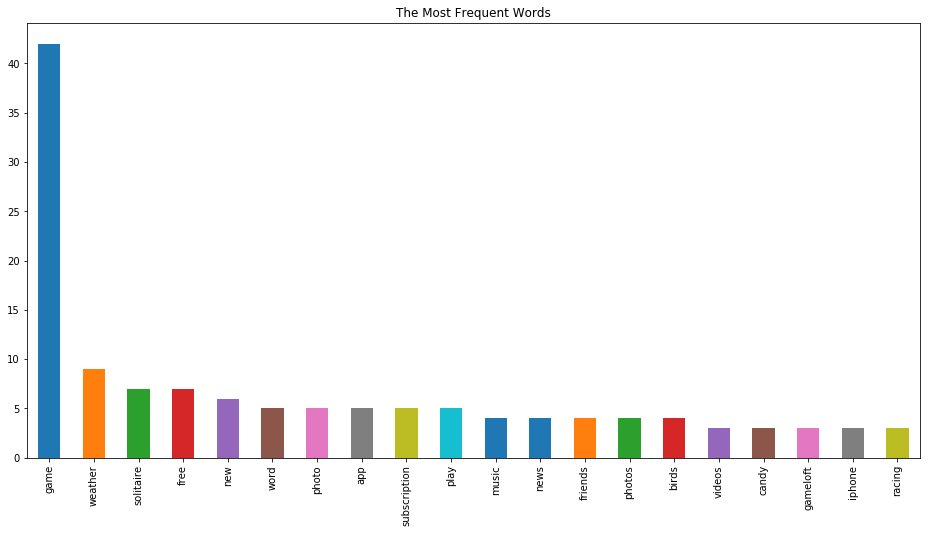

In [70]:
plt.figure(figsize=(16,8))
plt.title('The Most Frequent Words')
ratecount2_most_freq1.head(20).plot.bar()

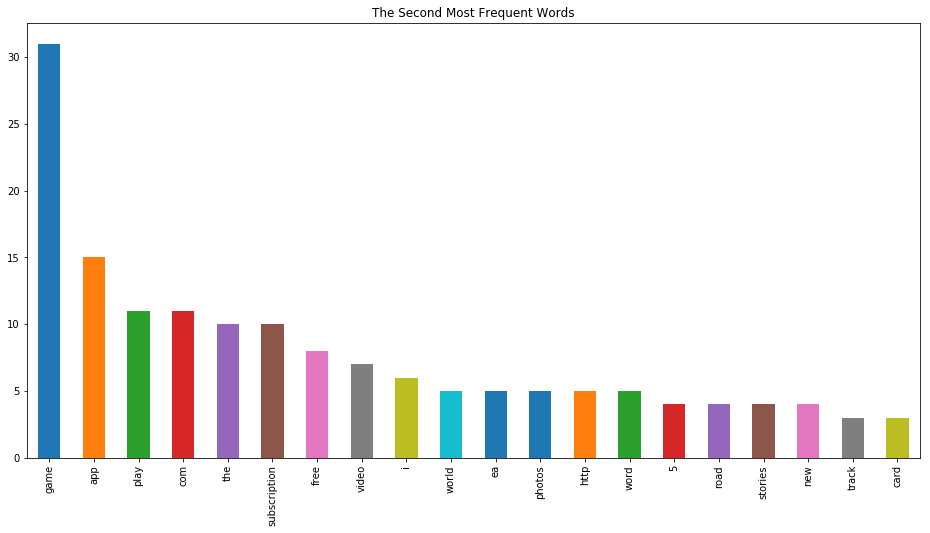

In [12]:
plt.figure(figsize=(16,8))
plt.title('The Second Most Frequent Words')
Rating_count2.most_freq_word_2nd.value_counts().head(20).plot.bar()

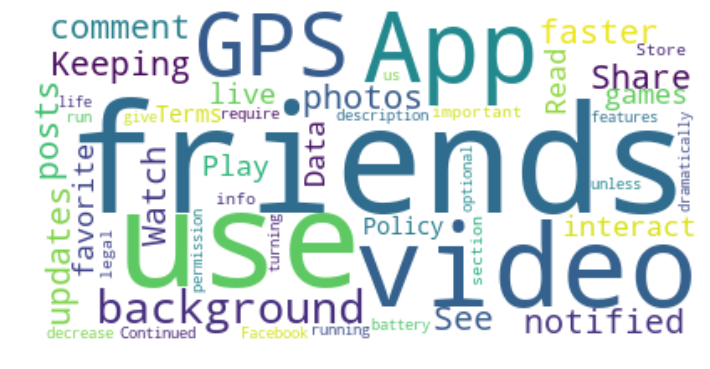

In [71]:
ratecount = Rating_count2.app_desc[0]

# Create and generate a word cloud image:
wordcloud = WordCloud(background_color="white").generate(ratecount)

# Display the generated image:
plt.figure(figsize=(12,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Top Rating (higher than 4.0)

In [9]:
app_info['app_desc'] = app_description['app_desc']
app_info.head()

,track_name,size_bytes,currency,price,rating_count_tot,rating_count_cur,user_rating,user_rating_cur,cont_rating,prime_genre,sup_devices_num,screenshot_num,lang_num,app_desc
0,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,4+,Games,38,5,10,"SAVE 20%, now only $3.99 for a limited time!\n..."
1,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,4+,Productivity,37,5,23,Let Evernote change the way you organize your ...
2,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,4+,Weather,37,5,3,Download the most popular free weather app pow...
3,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.0,4.5,12+,Shopping,37,5,9,The eBay app is the best way to find anything ...
4,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,4+,Reference,37,5,45,On more than 250 million devices around the wo...


In [10]:
top_rating = app_info[app_info['user_rating'] >= 4.0]
top_rating.reset_index(inplace = True, drop = True)
top_rating.head()

,track_name,size_bytes,currency,price,rating_count_tot,rating_count_cur,user_rating,user_rating_cur,cont_rating,prime_genre,sup_devices_num,screenshot_num,lang_num,app_desc
0,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,4+,Games,38,5,10,"SAVE 20%, now only $3.99 for a limited time!\n..."
1,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,4+,Productivity,37,5,23,Let Evernote change the way you organize your ...
2,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.0,4.5,12+,Shopping,37,5,9,The eBay app is the best way to find anything ...
3,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,4+,Reference,37,5,45,On more than 250 million devices around the wo...
4,Shanghai Mahjong,10485713,USD,0.99,8253,5516,4.0,4.0,4+,Games,47,5,1,"★ WINNER ""BEST GAME"" 2009\n★ 3rd PLACE WINNER ..."


In [22]:
# Find the top three most frequent words

for i in range(top_rating.shape[0]):
    words = top_rating['app_desc'][i]
    # remove punctuation
    tokenizer = RegexpTokenizer(r'\w+') 
    word_list = tokenizer.tokenize(words) 
    # lowercase and remove stopwords
    word_list = [word.lower() for word in word_list if word not in stopwords.words('english')] 
    # word frequence
    word_frequence = nltk.FreqDist(word_list)
    sort_freq = pd.Series(word_frequence).sort_values(ascending=False)
    top_rating.loc[i, 'most_freq_word_1st'] = sort_freq.index[0]
    top_rating.loc[i, 'most_freq_word_2nd'] = sort_freq.index[1]
    top_rating.loc[i, 'most_freq_word_3rd'] = sort_freq.index[2]
 

/Users/phoebewu/.local/lib/python3.6/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/Users/phoebewu/.local/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [11]:
top_rating.to_csv('top_rating.csv')
#top_rating = pd.read_csv('top_rating.csv', index_col=0)
top_rating.head()

,track_name,size_bytes,currency,price,rating_count_tot,rating_count_cur,user_rating,user_rating_cur,cont_rating,prime_genre,sup_devices_num,screenshot_num,lang_num,app_desc
0,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,4+,Games,38,5,10,"SAVE 20%, now only $3.99 for a limited time!\n..."
1,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,4+,Productivity,37,5,23,Let Evernote change the way you organize your ...
2,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.0,4.5,12+,Shopping,37,5,9,The eBay app is the best way to find anything ...
3,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,4+,Reference,37,5,45,On more than 250 million devices around the wo...
4,Shanghai Mahjong,10485713,USD,0.99,8253,5516,4.0,4.0,4+,Games,47,5,1,"★ WINNER ""BEST GAME"" 2009\n★ 3rd PLACE WINNER ..."


In [59]:
toprate_most_freq1 = top_rating.most_freq_word_1st.value_counts()
toprate_most_freq1 = toprate_most_freq1.drop('the')
toprate_most_freq1 = toprate_most_freq1.drop('com')
toprate_most_freq1 = toprate_most_freq1.drop('http')
toprate_most_freq1 = toprate_most_freq1.drop('5')
toprate_most_freq1 = toprate_most_freq1.drop('i')
toprate_most_freq1 = toprate_most_freq1.drop('us')
toprate_most_freq1 = toprate_most_freq1.drop('a')
toprate_most_freq1 = toprate_most_freq1.drop('you')

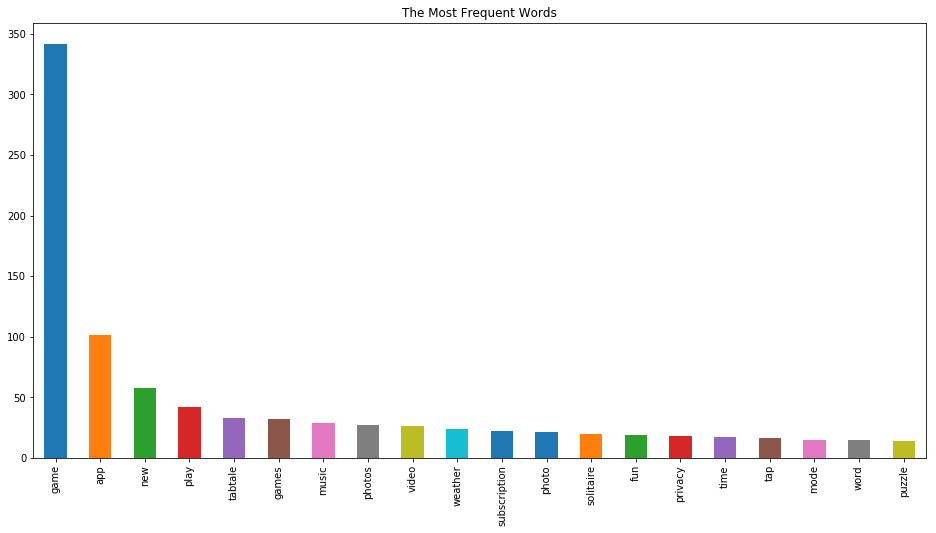

In [72]:
plt.figure(figsize=(16,8))
plt.title('The Most Frequent Words')
toprate_most_freq1.head(20).plot.bar()

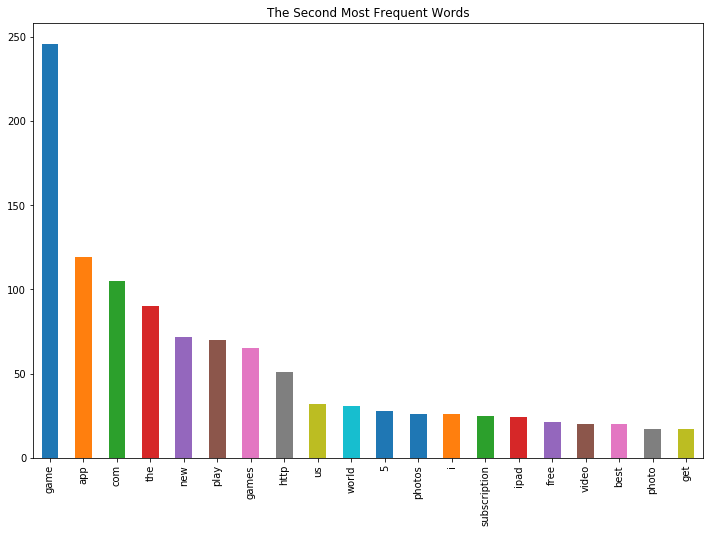

In [33]:
plt.figure(figsize=(12,8))
plt.title('The Second Most Frequent Words')
top_rating.most_freq_word_2nd.value_counts().head(20).plot.bar()

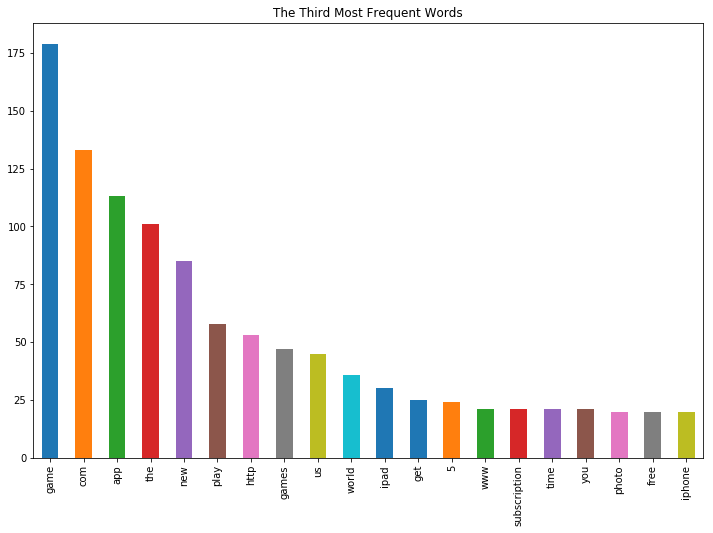

In [34]:
plt.figure(figsize=(12,8))
plt.title('The Third Most Frequent Words')
top_rating.most_freq_word_3rd.value_counts().head(20).plot.bar()

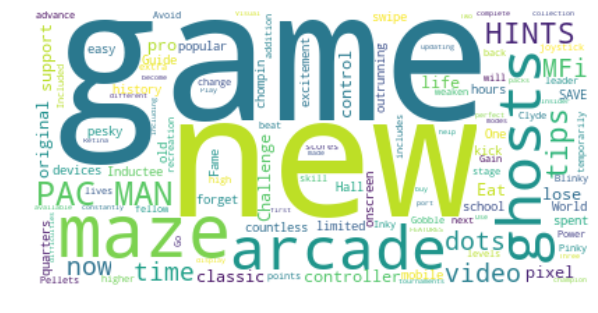

In [35]:
#Word cloud
text = app_description.app_desc[0]

# Create and generate a word cloud image:
wordcloud = WordCloud(background_color="white").generate(text)

# Display the generated image:
plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()